This file analyzes the results for the DBLSTM model for CS 230

In [1]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import os

py.offline.init_notebook_mode(connected=True)

In [2]:
# load results (will be added to)
root = os.getcwd()
trans_DF = pd.read_csv(root + '/nab/Data/trans_DF.csv').iloc[:,1:]
test_DF = trans_DF[trans_DF.test == 1].reset_index(drop = True).drop('fileloc', axis = 1)
test_DF['phonemes'] = test_DF.phonemes.apply(lambda x: x.split())

numtrain=trans_DF[trans_DF.train == 1].shape[0]
numdev=trans_DF[trans_DF.dev == 1].shape[0]
numtest=trans_DF[trans_DF.test == 1].shape[0]
numall = numtrain + numdev + numtest

print('Train-Dev-Test Split: ', str(numtrain/numall), '-', str(numdev/numall), '-', str(numtest/numall), sep='')

print(test_DF.shape) # true labels

Train-Dev-Test Split: 0.8387521725172418-0.07223273886619508-0.08901508861656315
(8041, 12)


In [3]:
test_DF[0:8]

,label,P1,P2,P3,P4,control,gender,word,train,dev,test,phonemes
0,CM13_B1_C1_M3,CM13,B1,C1,M3,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
1,CM13_B1_C1_M5,CM13,B1,C1,M5,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
2,CM13_B1_C1_M6,CM13,B1,C1,M6,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
3,CM13_B1_C1_M7,CM13,B1,C1,M7,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
4,CM13_B1_C1_M8,CM13,B1,C1,M8,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]"
5,CM13_B1_C10_M3,CM13,B1,C10,M3,1,M,line,0,0,1,"[l, ay1, n]"
6,CM13_B1_C10_M5,CM13,B1,C10,M5,1,M,line,0,0,1,"[l, ay1, n]"
7,CM13_B1_C10_M6,CM13,B1,C10,M6,1,M,line,0,0,1,"[l, ay1, n]"


# Google

In [4]:
goog_results = pd.read_csv(root + '/nab/Results/goog_results.csv', ).iloc[:,1:]
goog_results[0:5]

,label,transcript
0,M14_B3_CW72_M8,go
1,CM13_B2_UW98_M3,ring
2,F04_B1_UW85_M5,telephone
3,M16_B3_CW42_M8,NaN
4,M14_B1_UW71_M5,gigantic


In [5]:
# merge with google
goog_results = test_DF.merge(goog_results, how = 'inner', on = 'label')

# convert nubmers to spelling
nums = {'0': 'zero', '1': 'one', '2': 'two', '3': 'three', '4': 'four', '5': 'five', '6': 'six', '7': 'seven', '8': 'eight', '9': 'nine'}
for num,spell in nums.items():
    goog_results.loc[goog_results.transcript == num, 'transcript'] = spell

In [6]:
goog_results = goog_results.assign(correct = np.where(goog_results.word == goog_results.transcript, 1, 0))

In [7]:
print('Google accuracy on speakers with dyarthria: ', goog_results[goog_results.control == 1].correct.mean() * 100, '%', sep = '')
print('Google accuracy on speakers without dyarthria: ', goog_results[goog_results.control == 0].correct.mean() * 100, '%', sep = '')

Google accuracy on speakers with dyarthria: 85.84699453551913%
Google accuracy on speakers without dyarthria: 49.052727687742525%


# DBLSTM_06

Plot train loss

In [8]:
results_dir = os.path.join(root, 'nab/Results')
f = open(results_dir + '/DBLSTM_06/trainloss.txt', 'r')
losses = f.read().split()
losses = [float(i) for i in losses]
train_loss_DF = pd.DataFrame(data = {'batch_num': list(range(1, len(losses)+1)), 'loss': losses})

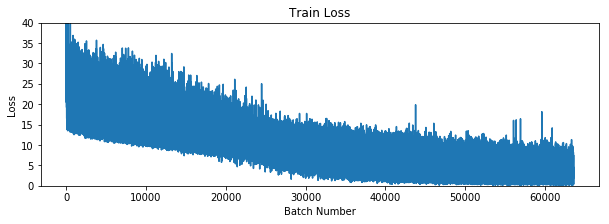

In [9]:
plt.figure(figsize=(10,3))
plt.title('Train Loss')
plt.ylabel('Loss')
plt.xlabel('Batch Number')
plt.plot(train_loss_DF.batch_num, train_loss_DF.loss)
plt.ylim(0, 40)
plt.show()

Manipulate test DF / get transcriptions of phonemes from models

In [10]:
f = open(results_dir + '/DBLSTM_06/transcriptions.txt', 'r')
dblstm_text = f.read().split('\n')
labels = [line.split()[0] for line in dblstm_text[0:-1]]
phonemes = [line.split()[1:] for line in dblstm_text[0:-1]]
dblstm_DF = pd.DataFrame(dict(label = labels, phonemes_pred = phonemes))

In [11]:
dblstm_DF = test_DF.merge(dblstm_DF, on = 'label', how = 'inner')
dblstm_DF[0:10]

,label,P1,P2,P3,P4,control,gender,word,train,dev,test,phonemes,phonemes_pred
0,CM13_B1_C1_M3,CM13,B1,C1,M3,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
1,CM13_B1_C1_M5,CM13,B1,C1,M5,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
2,CM13_B1_C1_M6,CM13,B1,C1,M6,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
3,CM13_B1_C1_M7,CM13,B1,C1,M7,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
4,CM13_B1_C1_M8,CM13,B1,C1,M8,1,M,command,0,0,1,"[k, ah0, m, ae1, n, d]","[k, ah0, m, ae1, n, d]"
5,CM13_B1_C10_M3,CM13,B1,C10,M3,1,M,line,0,0,1,"[l, ay1, n]","[n, ay1, n]"
6,CM13_B1_C10_M5,CM13,B1,C10,M5,1,M,line,0,0,1,"[l, ay1, n]","[l, ay1, n]"
7,CM13_B1_C10_M6,CM13,B1,C10,M6,1,M,line,0,0,1,"[l, ay1, n]","[n, ay1, n]"
8,CM13_B1_C10_M7,CM13,B1,C10,M7,1,M,line,0,0,1,"[l, ay1, n]","[n, ay1, n]"
9,CM13_B1_C10_M8,CM13,B1,C10,M8,1,M,line,0,0,1,"[l, ay1, n]","[m, ay1, n]"


Break down results by phoneme

In [12]:
f = open('nab/Data/alphabet.txt', 'r')
alph = f.read()
alph = alph.split()
alph.sort()

In [13]:
def rank_phonemes(alphabet, phonlistreal, phonlistpred):
    phondict = {phon:dict(bad = 0, total = 0, PER = 0) for phon in alph}
    for i in range(len(phonlistreal)):
        for phon in phonlistreal[i]:
            if phon not in phonlistpred[i]:
                phondict[phon]['bad'] += 1
            phondict[phon]['total'] += 1
    for phon, vals in phondict.items():
        phondict[phon]['PER'] = phondict[phon]['bad']*100/phondict[phon]['total']
    phon_DF = pd.DataFrame(data=dict(phoneme=list(phondict.keys()), 
                                     bad = [phondict[key]['bad'] for key,value in phondict.items()],
                                     total = [phondict[key]['total'] for key,value in phondict.items()],
                                     PER = [phondict[key]['PER'] for key,value in phondict.items()],
                                    ))
    lastrow = pd.DataFrame(columns=list(phon_DF.columns))
    lastrow.loc[0, 'bad'] = phon_DF['bad'].sum()
    lastrow.loc[0, 'total'] = phon_DF['total'].sum()
    lastrow['PER'] = lastrow.loc[0,'bad']*100/lastrow.loc[0,'total']
    lastrow['phoneme'] = 'all'
    phon_DF = phon_DF.append(lastrow).reset_index(drop=True)
    return phon_DF

In [14]:
top_30=list(rank_phonemes(alph, list(dblstm_DF['phonemes']), list(dblstm_DF['phonemes_pred'])).sort_values('total', ascending=False).phoneme[0:31])
top_30.sort()
top_30.append(top_30.pop(top_30.index('all')))
print(top_30)

['aa1', 'ae1', 'ah0', 'ah1', 'ay1', 'b', 'd', 'dh', 'eh1', 'er0', 'ey1', 'f', 'g', 'hh', 'ih0', 'ih1', 'iy0', 'iy1', 'k', 'l', 'm', 'n', 'p', 'r', 's', 't', 'uw1', 'v', 'w', 'z', 'all']


In [15]:
peopleset = set(dblstm_DF['P1'])
PER_DF = pd.DataFrame()
for person in peopleset:
    df = rank_phonemes(alph, list(dblstm_DF.loc[dblstm_DF.P1 == person, 'phonemes']), list(dblstm_DF.loc[dblstm_DF.P1 == person, 'phonemes_pred']))
    df['P1'] = person
    df = df.drop(labels=['bad', 'total'], axis=1).pivot(index='P1', columns='phoneme', values='PER')
    df = df[top_30]
    PER_DF = PER_DF.append(df)

In [16]:
PER_DF

phoneme,aa1,ae1,ah0,ah1,ay1,b,d,dh,eh1,er0,...,n,p,r,s,t,uw1,v,w,z,all
P1,,,,,,,,,,,,,,,,,,,,,
F04,72.380952,60.431655,39.150943,61.000000,54.285714,55.056180,63.675214,65.048544,73.750000,67.105263,...,65.846995,50.000000,70.229008,59.493671,38.150289,60.952381,86.419753,56.097561,77.586207,61.735861
M14,37.007874,28.476821,29.004329,44.444444,25.663717,49.230769,44.396552,39.784946,33.540373,51.034483,...,39.005236,29.787234,42.105263,11.382114,28.157895,31.372549,71.951220,22.222222,27.972028,38.641321
CM13,24.137931,19.743590,9.082569,20.357143,7.037037,30.927835,12.892562,22.040816,20.227273,14.358974,...,16.813187,20.810811,23.503650,10.081301,8.636364,31.372549,35.652174,12.000000,17.878788,19.621690
M16,62.601626,62.337662,46.116505,48.360656,46.534653,56.983240,47.881356,61.702128,61.676647,62.043796,...,54.838710,45.695364,70.134228,45.238095,30.727763,41.739130,75.641026,37.423313,62.121212,55.966493


Create heatmap of common phonemes

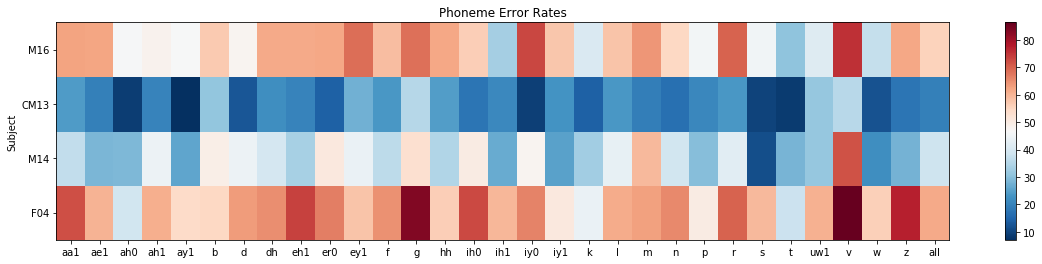

In [17]:
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20,4))

c = ax.pcolormesh(PER_DF, cmap='RdBu_r')
ax.set_title('Phoneme Error Rates')
fig.colorbar(c, ax=ax)

plt.ylabel('Subject')
plt.yticks(np.linspace(0.5, 3.5, 4), peopleset)
plt.xticks(np.linspace(0.5, 30.5, 31), top_30)
plt.show()

Find top 5 best and worst phonemes for control, dysarthric, and difference

In [18]:
dblstm_d_DF = dblstm_DF[dblstm_DF['control'] == 0]
dblstm_c_DF = dblstm_DF[dblstm_DF['control'] != 0]

In [19]:
phon_c_DF = rank_phonemes(alph, list(dblstm_c_DF['phonemes']), list(dblstm_c_DF['phonemes_pred'])).sort_values('PER')
phon_c_DF = phon_c_DF[phon_c_DF['phoneme'].apply(lambda x: x in top_30)]

In [20]:
phon_c_DF_best = phon_c_DF[0:5]
phon_c_DF_best

,phoneme,bad,total,PER
13,ay1,19,270,7.037037
52,t,76,880,8.636364
6,ah0,99,1090,9.082569
34,iy0,25,270,9.259259
50,s,62,615,10.081301


In [21]:
phon_c_DF_worst = phon_c_DF[-5:]
phon_c_DF_worst

,phoneme,bad,total,PER
26,ey1,68,245,27.755102
15,b,150,485,30.927835
57,uw1,80,255,31.372549
29,g,80,225,35.555556
59,v,82,230,35.652174


In [22]:
phon_d_DF = rank_phonemes(alph, list(dblstm_d_DF['phonemes']), list(dblstm_d_DF['phonemes_pred'])).sort_values('PER')
phon_d_DF = phon_d_DF[phon_d_DF['phoneme'].apply(lambda x: x in top_30)]

In [23]:
phon_d_DF_best = phon_d_DF[0:5]
phon_d_DF_best

,phoneme,bad,total,PER
52,t,353,1097,32.178669
6,ah0,490,1298,37.750385
50,s,283,735,38.503401
60,w,189,489,38.650307
38,k,273,701,38.944365


In [24]:
phon_d_DF_worst = phon_d_DF[-5:]
phon_d_DF_worst

,phoneme,bad,total,PER
49,r,521,864,60.300926
40,m,381,611,62.356792
34,iy0,207,330,62.727273
29,g,172,251,68.525896
59,v,188,241,78.008299


In [25]:
phon_diff_DF = pd.DataFrame(data = dict(phoneme=phon_d_DF['phoneme'], PER_pct=phon_d_DF['PER']-phon_c_DF['PER'])).sort_values('PER_pct')

In [26]:
phon_diff_DF_best = phon_diff_DF[0:5]
phon_diff_DF_best

,phoneme,PER_pct
57,uw1,13.347948
32,ih1,19.232237
48,p,21.011619
35,iy1,21.242236
15,b,22.695353


In [27]:
phon_diff_DF_worst = phon_diff_DF[-5:]
phon_diff_DF_worst

,phoneme,PER_pct
59,v,42.356125
31,ih0,42.400000
40,m,42.962853
22,er0,45.779274
34,iy0,53.468013


In [28]:
bad = 0
phon_d = list(dblstm_d_DF.phonemes)
phon_d_pred = list(dblstm_d_DF.phonemes_pred)
for i in range(len(dblstm_d_DF)):
    if phon_d[i] != phon_d_pred[i]:
        bad += 1
dblstm_WER = bad/len(dblstm_d_DF)
dblstm_WER

0.7573613330289888